Model Error-Trend-Seasonal

damping : trend melemah

# 1. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 2. Forecasting
## 2.1. Example 1 : Cheese Production

<Axes: xlabel='date'>

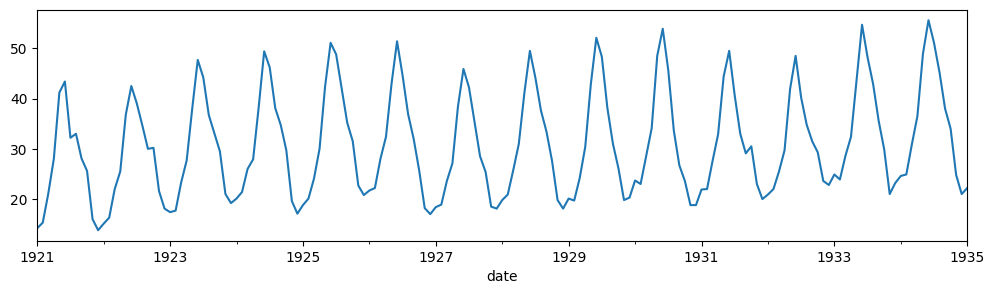

In [3]:
path_loc = '/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/11. Time Series/'
df = pd.read_csv(path_loc+'cheese_fred.csv',index_col='date', parse_dates=['date'])
series = df.total_cheese_production
series.plot(figsize=(12,3))

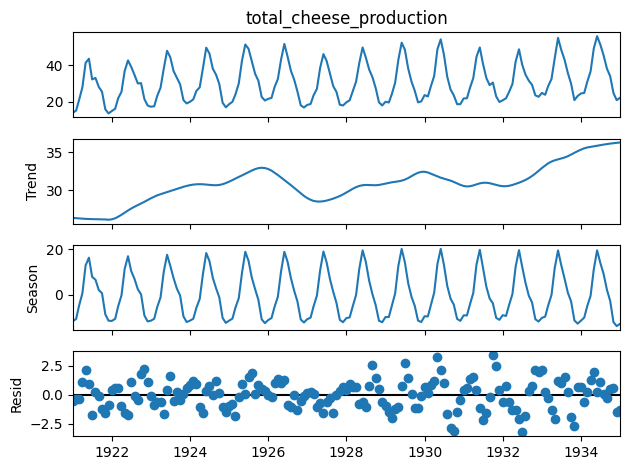

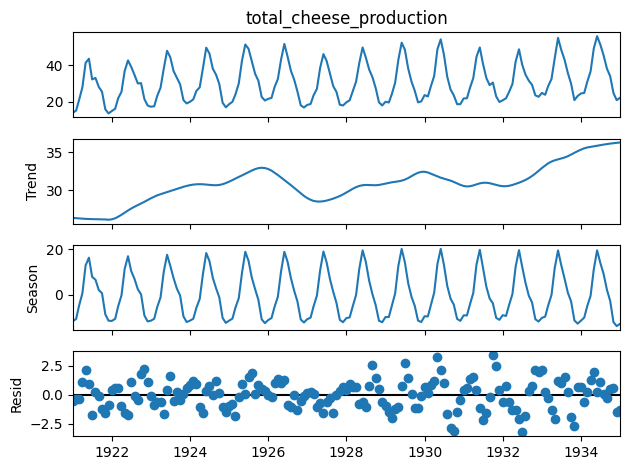

In [4]:
## Check Add/Mul
STL(series).fit().plot()

Hasil Analisa :
- trend : add,damping
- seasonal : add
- seasonal period : 1 tahun => 12 bulan

### Modeling

In [4]:
## Data Splitting : Jumlah datanya ada 169
X_train = series[:-25]
X_test  = series[-25:]

Ada berapa persen X_train dan X_test?
- X_train = 144 => 100*144/169 ~ 85%
- X_test  =  25 => 100*25/169  ~ 15%

In [6]:
## Modeling with ETS Model
model = ExponentialSmoothing(X_train,
                             trend='add',
                             damped_trend=True,
                             seasonal='add',
                             seasonal_periods=12)

model = model.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


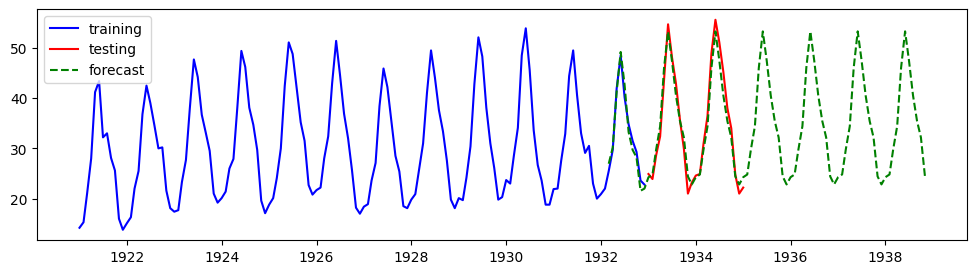

In [16]:
## Forecasting
def forecasting_result(X_train,X_test,model):
    pred = model.predict(len(X_train)-10,len(X_train)+70)

    plt.figure(figsize=(12,3))
    plt.plot(X_train,"b-",label='training')
    plt.plot(X_test,"r-",label='testing')
    plt.plot(pred,"g--",label='forecast')
    plt.legend()
    plt.show()

forecasting_result(X_train,X_test,model)

## 2.2. Example 2 : Airline Passengers

<Axes: xlabel='Date'>

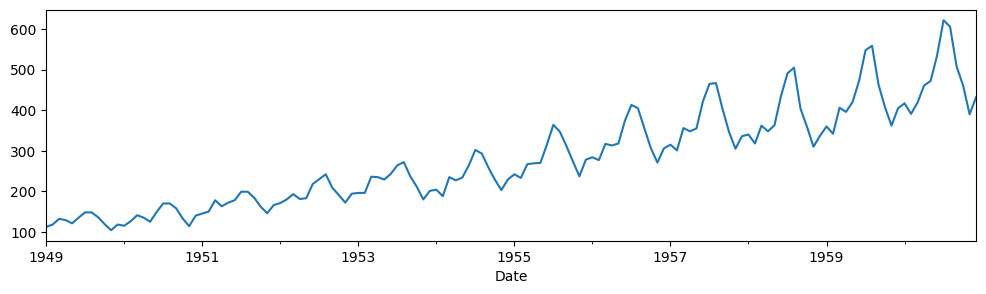

In [21]:
path_loc = '/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/11. Time Series/'
df = pd.read_csv(path_loc+'airline.csv',index_col='Date', parse_dates=['Date'])
series = df.passengers
series.plot(figsize=(12,3))

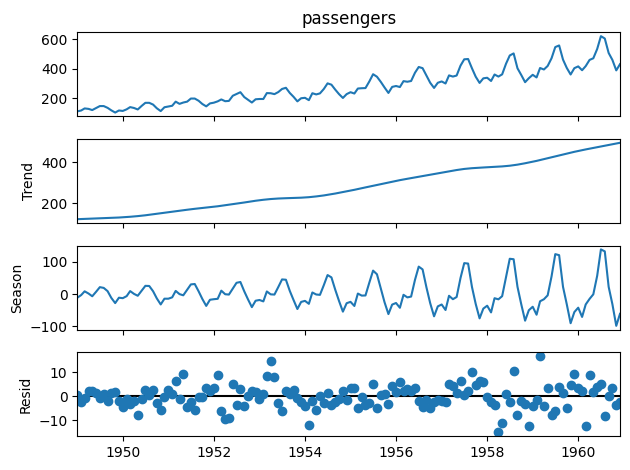

In [23]:
## Check add/mul
plot_var = STL(series).fit().plot();

Analisa :
- trend : mul
- damped_trend : False
- seasonality  : mul
- seasonal periods : 1 tahun -> 12 bulan

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


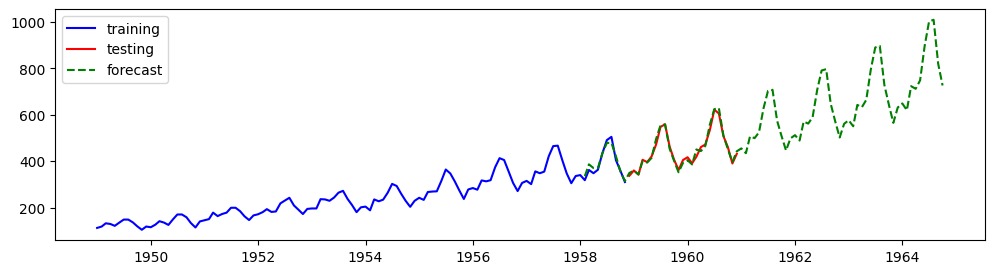

In [33]:
## Data Splitting : Jumlah datanya ada 169
X_train = series[:-25]
X_test  = series[-25:]

## Modeling with ETS Model
model = ExponentialSmoothing(X_train,
                             trend='mul',
                             damped_trend=False,
                             seasonal='mul',
                             seasonal_periods=12)

model = model.fit(optimized=True)

forecasting_result(X_train,X_test,model)